In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

In [11]:
df = pd.read_csv('NHL_dataframe.csv')

In [12]:
len(df)

304

In [13]:
len(list(df.columns))

49

In [14]:
df.head()

,teamID_seasonID,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed_x,goalsAgainstPerGame,goalsPerGame,losses_x,ot,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,shootingPctg_x,shotsAllowed,shotsPerGame,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins_x,blockedShots,faceoffWinPctg,faceoffs,faceoffsLost,faceoffsWon,giveaways,goalsFor,hits,missedShots,otLosses,points,shotsFor,takeaways,teamAbbrev,teamFullName,ties,games_playoffs,goals_playoffs,wins_playoffs,playoff_performance
0,2_20182019,1.2756,47.4,2353.0,4477.0,2124.0,82,2.329,2.720,27,7,79.9,33.0,44.0,227.0,14.5,62.8,103,0.925,9.4,30.9024,28.7805,0.710,0.850,0.459,0.531,0.646,0.689,48,1295,0.4744,4477,2353,2124,950,223,2031,869,7,103,2360,556,NYI,New York Islanders,0,8,19,4,0.500000
1,5_20182019,1.2133,50.6,2426.0,4908.0,2482.0,82,2.902,3.305,26,12,79.7,56.0,45.0,228.0,24.6,61.0,100,0.913,9.9,33.2805,33.3049,0.750,0.923,0.457,0.417,0.634,0.596,44,1229,0.5057,4908,2426,2482,825,271,2363,912,12,100,2731,633,PIT,Pittsburgh Penguins,0,4,6,0,0.000000
2,6_20182019,1.2266,50.7,2385.0,4840.0,2455.0,82,2.585,3.134,24,9,79.9,65.0,49.0,251.0,25.9,65.2,107,0.912,9.6,29.4634,32.6829,0.806,0.838,0.417,0.563,0.625,0.739,49,1050,0.5072,4840,2385,2455,808,257,1876,1054,9,107,2680,715,BOS,Boston Bruins,0,24,79,15,0.625000
3,10_20182019,1.2047,53.0,2330.0,4959.0,2629.0,82,3.037,3.488,28,8,79.9,46.0,41.0,211.0,21.8,61.0,100,0.908,10.5,33.1341,33.3659,0.828,0.973,0.375,0.571,0.561,0.738,46,1113,0.5301,4959,2330,2629,1002,286,1421,1238,8,100,2736,695,TOR,Toronto Maple Leafs,0,7,17,3,0.428571
4,12_20182019,1.0878,49.0,2532.0,4968.0,2436.0,82,2.695,2.963,29,7,81.6,44.0,44.0,247.0,17.8,60.4,99,0.906,8.6,28.5732,34.4146,0.862,0.872,0.333,0.509,0.708,0.767,46,1044,0.4903,4968,2532,2436,911,243,2073,1214,7,99,2822,889,CAR,Carolina Hurricanes,0,15,39,8,0.533333


In [18]:
df.playoff_performance.describe()

count    304.000000
mean       0.416491
std        0.179704
min        0.000000
25%        0.333333
50%        0.428571
75%        0.540210
max        0.800000
Name: playoff_performance, dtype: float64

In [19]:
df.goals_playoffs.describe()

count    304.000000
mean      28.286184
std       19.964333
min        2.000000
25%       12.000000
50%       22.000000
75%       41.000000
max       88.000000
Name: goals_playoffs, dtype: float64

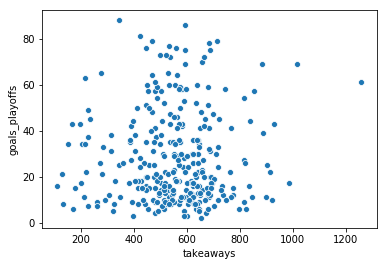

In [17]:
ax = sns.scatterplot(x='takeaways', y='goals_playoffs', data=df)

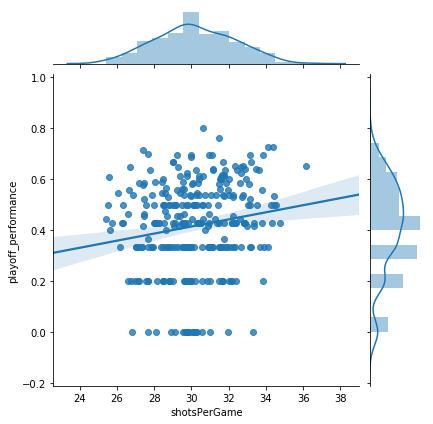

In [28]:
sns.jointplot(x="shotsPerGame", y="playoff_performance", data=df, kind="reg")

In [29]:
df.head()

,teamID_seasonID,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed_x,goalsAgainstPerGame,goalsPerGame,losses_x,ot,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,shootingPctg_x,shotsAllowed,shotsPerGame,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins_x,blockedShots,faceoffWinPctg,faceoffs,faceoffsLost,faceoffsWon,giveaways,goalsFor,hits,missedShots,otLosses,points,shotsFor,takeaways,teamAbbrev,teamFullName,ties,games_playoffs,goals_playoffs,wins_playoffs,playoff_performance
0,2_20182019,1.2756,47.4,2353.0,4477.0,2124.0,82,2.329,2.720,27,7,79.9,33.0,44.0,227.0,14.5,62.8,103,0.925,9.4,30.9024,28.7805,0.710,0.850,0.459,0.531,0.646,0.689,48,1295,0.4744,4477,2353,2124,950,223,2031,869,7,103,2360,556,NYI,New York Islanders,0,8,19,4,0.500000
1,5_20182019,1.2133,50.6,2426.0,4908.0,2482.0,82,2.902,3.305,26,12,79.7,56.0,45.0,228.0,24.6,61.0,100,0.913,9.9,33.2805,33.3049,0.750,0.923,0.457,0.417,0.634,0.596,44,1229,0.5057,4908,2426,2482,825,271,2363,912,12,100,2731,633,PIT,Pittsburgh Penguins,0,4,6,0,0.000000
2,6_20182019,1.2266,50.7,2385.0,4840.0,2455.0,82,2.585,3.134,24,9,79.9,65.0,49.0,251.0,25.9,65.2,107,0.912,9.6,29.4634,32.6829,0.806,0.838,0.417,0.563,0.625,0.739,49,1050,0.5072,4840,2385,2455,808,257,1876,1054,9,107,2680,715,BOS,Boston Bruins,0,24,79,15,0.625000
3,10_20182019,1.2047,53.0,2330.0,4959.0,2629.0,82,3.037,3.488,28,8,79.9,46.0,41.0,211.0,21.8,61.0,100,0.908,10.5,33.1341,33.3659,0.828,0.973,0.375,0.571,0.561,0.738,46,1113,0.5301,4959,2330,2629,1002,286,1421,1238,8,100,2736,695,TOR,Toronto Maple Leafs,0,7,17,3,0.428571
4,12_20182019,1.0878,49.0,2532.0,4968.0,2436.0,82,2.695,2.963,29,7,81.6,44.0,44.0,247.0,17.8,60.4,99,0.906,8.6,28.5732,34.4146,0.862,0.872,0.333,0.509,0.708,0.767,46,1044,0.4903,4968,2532,2436,911,243,2073,1214,7,99,2822,889,CAR,Carolina Hurricanes,0,15,39,8,0.533333


In [30]:
df[df['teamID_seasonID'] == '11_20112012']

,teamID_seasonID,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed_x,goalsAgainstPerGame,goalsPerGame,losses_x,ot,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,shootingPctg_x,shotsAllowed,shotsPerGame,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins_x,blockedShots,faceoffWinPctg,faceoffs,faceoffsLost,faceoffsWon,giveaways,goalsFor,hits,missedShots,otLosses,points,shotsFor,takeaways,teamAbbrev,teamFullName,ties,games_playoffs,goals_playoffs,wins_playoffs,playoff_performance


In [31]:
import requests

In [33]:
url = 'https://statsapi.web.nhl.com/api/v1/teams/11/stats'
response = requests.get(url)
data = response.json()

In [34]:
data

{'copyright': 'NHL and the NHL Shield are registered trademarks of the National Hockey League. NHL and NHL team marks are the property of the NHL and its teams. © NHL 2019. All Rights Reserved.',
 'stats': [{'type': {'displayName': 'statsSingleSeason'}, 'splits': []},
  {'type': {'displayName': 'regularSeasonStatRankings'}, 'splits': []}]}

In [35]:
def get_regseason_defense_stats(list_of_seasons):
    # empty list to hold our team shot stats 
    team_defense_stats = []
    # iterate through the list of seasons
    for seasonID in list_of_seasons:
        season_url = f"https://api.nhle.com/stats/rest/team?isAggregate=false&reportType=basic&isGame=false&reportName=realtime&sort=[{{%22property%22:%22hits%22,%22direction%22:%22DESC%22}}]&cayenneExp=leagueId=133%20and%20gameTypeId=2%20and%20seasonId%3E={seasonID}%20and%20seasonId%3C={seasonID}"
        response = requests.get(season_url)
        data = response.json()['data']
        for team_defense in data:
            team_defense_stats.append(team_defense)
    return team_defense_stats

In [42]:
season_ids = [
'19992000',
 '20002001',
 '20012002',
 '20022003',
 '20032004',
 '20052006',
 '20062007',
 '20072008',
 '20082009',
 '20092010',
 '20102011',
 '20112012',
 '20122013',
 '20132014',
 '20142015',
 '20152016',
 '20162017',
 '20172018',
 '20182019']

In [44]:
team_defense_stats = get_regseason_defense_stats(season_ids)

In [45]:
team_defense_stats

[{'blockedShots': 1045,
  'faceoffWinPctg': 0.4787,
  'faceoffs': 5540,
  'faceoffsLost': 2888,
  'faceoffsWon': 2652,
  'gamesPlayed': 82,
  'giveaways': 762,
  'goalsFor': 194,
  'hits': 2655,
  'losses': 48,
  'missedShots': 905,
  'otLosses': 1,
  'points': 58,
  'seasonId': 19992000,
  'shootingPctg': 0.0903,
  'shotsFor': 2147,
  'takeaways': 640,
  'teamAbbrev': 'NYI',
  'teamFullName': 'New York Islanders',
  'teamId': 2,
  'ties': 9,
  'wins': 24},
 {'blockedShots': 828,
  'faceoffWinPctg': 0.4895,
  'faceoffs': 5286,
  'faceoffsLost': 2698,
  'faceoffsWon': 2588,
  'gamesPlayed': 82,
  'giveaways': 763,
  'goalsFor': 210,
  'hits': 2563,
  'losses': 33,
  'missedShots': 979,
  'otLosses': 6,
  'points': 73,
  'seasonId': 19992000,
  'shootingPctg': 0.0834,
  'shotsFor': 2516,
  'takeaways': 666,
  'teamAbbrev': 'BOS',
  'teamFullName': 'Boston Bruins',
  'teamId': 6,
  'ties': 19,
  'wins': 24},
 {'blockedShots': 962,
  'faceoffWinPctg': 0.5174,
  'faceoffs': 5438,
  'faceoff

In [46]:
import pandas as pd

In [47]:
df = pd.DataFrame(team_defense_stats)

In [49]:
len(df)

570

In [50]:
df.columns

Index(['blockedShots', 'faceoffWinPctg', 'faceoffs', 'faceoffsLost',
       'faceoffsWon', 'gamesPlayed', 'giveaways', 'goalsFor', 'hits', 'losses',
       'missedShots', 'otLosses', 'points', 'seasonId', 'shootingPctg',
       'shotsFor', 'takeaways', 'teamAbbrev', 'teamFullName', 'teamId', 'ties',
       'wins'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 22 columns):
blockedShots      570 non-null int64
faceoffWinPctg    570 non-null float64
faceoffs          570 non-null int64
faceoffsLost      570 non-null int64
faceoffsWon       570 non-null int64
gamesPlayed       570 non-null int64
giveaways         570 non-null int64
goalsFor          570 non-null int64
hits              570 non-null int64
losses            570 non-null int64
missedShots       570 non-null int64
otLosses          570 non-null int64
points            570 non-null int64
seasonId          570 non-null int64
shootingPctg      570 non-null float64
shotsFor          570 non-null int64
takeaways         570 non-null int64
teamAbbrev        570 non-null object
teamFullName      570 non-null object
teamId            570 non-null int64
ties              570 non-null int64
wins              570 non-null int64
dtypes: float64(2), int64(18), object(2)
memory usage: 98.0+ KB


In [53]:
df['teamId'] = df.teamId.astype(str)

In [57]:
df['seasonId'] = df.seasonId.astype(str)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 22 columns):
blockedShots      570 non-null int64
faceoffWinPctg    570 non-null float64
faceoffs          570 non-null int64
faceoffsLost      570 non-null int64
faceoffsWon       570 non-null int64
gamesPlayed       570 non-null int64
giveaways         570 non-null int64
goalsFor          570 non-null int64
hits              570 non-null int64
losses            570 non-null int64
missedShots       570 non-null int64
otLosses          570 non-null int64
points            570 non-null int64
seasonId          570 non-null object
shootingPctg      570 non-null float64
shotsFor          570 non-null int64
takeaways         570 non-null int64
teamAbbrev        570 non-null object
teamFullName      570 non-null object
teamId            570 non-null object
ties              570 non-null int64
wins              570 non-null int64
dtypes: float64(2), int64(16), object(4)
memory usage: 98.0+ KB


In [59]:
df['teamID_seasonID'] = df['teamId'].str.cat(df['seasonId'], sep='_')

In [61]:
df.head()

,blockedShots,faceoffWinPctg,faceoffs,faceoffsLost,faceoffsWon,gamesPlayed,giveaways,goalsFor,hits,losses,missedShots,otLosses,points,seasonId,shootingPctg,shotsFor,takeaways,teamAbbrev,teamFullName,teamId,ties,wins,teamID_seasonID
0,1045,0.4787,5540,2888,2652,82,762,194,2655,48,905,1,58,19992000,0.0903,2147,640,NYI,New York Islanders,2,9,24,2_19992000
1,828,0.4895,5286,2698,2588,82,763,210,2563,33,979,6,73,19992000,0.0834,2516,666,BOS,Boston Bruins,6,19,24,6_19992000
2,962,0.5174,5438,2624,2814,82,1225,245,2442,27,1162,4,94,19992000,0.1011,2421,681,LAK,Los Angeles Kings,26,12,39,26_19992000
3,1079,0.4606,5419,2923,2496,82,787,170,2353,57,913,4,39,19992000,0.0803,2115,839,ATL,Atlanta Thrashers,11,7,14,11_19992000
4,985,0.5327,5485,2563,2922,82,1172,227,2321,24,939,2,102,19992000,0.1000,2269,631,WSH,Washington Capitals,15,12,44,15_19992000


In [62]:
df.set_index('teamID_seasonID', inplace=True)

In [63]:
df.head()

,blockedShots,faceoffWinPctg,faceoffs,faceoffsLost,faceoffsWon,gamesPlayed,giveaways,goalsFor,hits,losses,missedShots,otLosses,points,seasonId,shootingPctg,shotsFor,takeaways,teamAbbrev,teamFullName,teamId,ties,wins
teamID_seasonID,,,,,,,,,,,,,,,,,,,,,,
2_19992000,1045,0.4787,5540,2888,2652,82,762,194,2655,48,905,1,58,19992000,0.0903,2147,640,NYI,New York Islanders,2,9,24
6_19992000,828,0.4895,5286,2698,2588,82,763,210,2563,33,979,6,73,19992000,0.0834,2516,666,BOS,Boston Bruins,6,19,24
26_19992000,962,0.5174,5438,2624,2814,82,1225,245,2442,27,1162,4,94,19992000,0.1011,2421,681,LAK,Los Angeles Kings,26,12,39
11_19992000,1079,0.4606,5419,2923,2496,82,787,170,2353,57,913,4,39,19992000,0.0803,2115,839,ATL,Atlanta Thrashers,11,7,14
15_19992000,985,0.5327,5485,2563,2922,82,1172,227,2321,24,939,2,102,19992000,0.1000,2269,631,WSH,Washington Capitals,15,12,44


In [65]:
df.drop(['teamId', 'seasonId'], axis=1, inplace=True)

In [66]:
df.head()

,blockedShots,faceoffWinPctg,faceoffs,faceoffsLost,faceoffsWon,gamesPlayed,giveaways,goalsFor,hits,losses,missedShots,otLosses,points,shootingPctg,shotsFor,takeaways,teamAbbrev,teamFullName,ties,wins
teamID_seasonID,,,,,,,,,,,,,,,,,,,,
2_19992000,1045,0.4787,5540,2888,2652,82,762,194,2655,48,905,1,58,0.0903,2147,640,NYI,New York Islanders,9,24
6_19992000,828,0.4895,5286,2698,2588,82,763,210,2563,33,979,6,73,0.0834,2516,666,BOS,Boston Bruins,19,24
26_19992000,962,0.5174,5438,2624,2814,82,1225,245,2442,27,1162,4,94,0.1011,2421,681,LAK,Los Angeles Kings,12,39
11_19992000,1079,0.4606,5419,2923,2496,82,787,170,2353,57,913,4,39,0.0803,2115,839,ATL,Atlanta Thrashers,7,14
15_19992000,985,0.5327,5485,2563,2922,82,1172,227,2321,24,939,2,102,0.1000,2269,631,WSH,Washington Capitals,12,44


In [67]:
df.to_csv('NHL_defense_stats.csv')

In [68]:
len(df)

570

In [69]:
full_df = pd.read_csv('Final_NHL_stats.csv')

In [70]:
full_df.head()

,Unnamed: 0,teamID_seasonID,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed_x,goalsAgainstPerGame,goalsPerGame,losses_x,ot,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,shootingPctg_x,shotsAllowed,shotsPerGame,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins_x,blockedShots,faceoffWinPctg,faceoffs,faceoffsLost,faceoffsWon,gamesPlayed_y,giveaways,goalsFor,hits,losses_y,missedShots,otLosses,points,shootingPctg_y,shotsFor,takeaways,teamAbbrev,teamFullName,ties,wins_y
0,0,1_19992000,0.9286,49.3,2632.0,5195.0,2563.0,82,2.476,3.061,24,5,87.5,55.0,39.0,274.0,20.1,62.8,103,0.903,9.2,25.6220,33.1341,0.700,0.882,0.459,0.587,0.471,0.622,45,877,0.4933,5195,2632,2563,82,984,251,2146,24,1262,5,103,0.0923,2717,1258,NJD,New Jersey Devils,8,45
1,1,1_20002001,1.1969,49.4,2662.0,5259.0,2597.0,82,2.378,3.598,19,3,84.6,71.0,49.0,310.0,22.9,67.7,111,0.904,11.4,24.6829,31.5854,0.839,0.921,0.421,0.583,0.684,0.727,48,856,0.4938,5259,2662,2597,82,1011,295,2027,19,1198,3,111,0.1138,2590,1015,NJD,New Jersey Devils,12,48
2,2,1_20012002,1.1969,49.5,2603.0,5156.0,2553.0,82,2.280,2.500,28,4,83.7,44.0,43.0,261.0,16.9,57.9,95,0.902,8.4,23.1707,29.8171,0.750,0.774,0.275,0.452,0.632,0.714,41,920,0.4951,5156,2603,2553,82,888,205,1983,28,1155,4,95,0.0838,2445,898,NJD,New Jersey Devils,9,41
3,3,1_20022003,1.3684,50.7,2467.0,5002.0,2535.0,82,2.024,2.634,20,6,87.8,36.0,32.0,303.0,11.9,65.9,108,0.914,8.3,23.5732,31.7195,0.821,0.846,0.353,0.523,0.692,0.708,46,303,0.5067,5002,2467,2535,82,270,216,487,20,371,6,108,0.0830,2601,214,NJD,New Jersey Devils,10,46
4,4,1_20032004,1.2636,49.2,2497.0,4916.0,2419.0,82,2.000,2.598,25,2,85.3,51.0,39.0,312.0,16.4,61.0,100,0.918,8.8,24.4024,29.6707,0.821,0.842,0.176,0.559,0.500,0.771,43,834,0.4920,4916,2497,2419,82,1073,213,928,25,974,2,100,0.0875,2433,619,NJD,New Jersey Devils,12,43


In [71]:
full_df.columns

Index(['Unnamed: 0', 'teamID_seasonID', 'evGGARatio', 'faceOffWinPercentage',
       'faceOffsLost', 'faceOffsTaken', 'faceOffsWon', 'gamesPlayed_x',
       'goalsAgainstPerGame', 'goalsPerGame', 'losses_x', 'ot',
       'penaltyKillPercentage', 'powerPlayGoals', 'powerPlayGoalsAgainst',
       'powerPlayOpportunities', 'powerPlayPercentage', 'ptPctg', 'pts',
       'savePctg', 'shootingPctg_x', 'shotsAllowed', 'shotsPerGame',
       'winLeadFirstPer', 'winLeadSecondPer', 'winOppScoreFirst',
       'winOutshootOpp', 'winOutshotByOpp', 'winScoreFirst', 'wins_x',
       'blockedShots', 'faceoffWinPctg', 'faceoffs', 'faceoffsLost',
       'faceoffsWon', 'gamesPlayed_y', 'giveaways', 'goalsFor', 'hits',
       'losses_y', 'missedShots', 'otLosses', 'points', 'shootingPctg_y',
       'shotsFor', 'takeaways', 'teamAbbrev', 'teamFullName', 'ties',
       'wins_y'],
      dtype='object')

In [72]:
full_df.set_index('teamID_seasonID', inplace=True)

In [73]:
full_df.describe()

,Unnamed: 0,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed_x,goalsAgainstPerGame,goalsPerGame,losses_x,ot,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,shootingPctg_x,shotsAllowed,shotsPerGame,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins_x,blockedShots,faceoffWinPctg,faceoffs,faceoffsLost,faceoffsWon,gamesPlayed_y,giveaways,goalsFor,hits,losses_y,missedShots,otLosses,points,shootingPctg_y,shotsFor,takeaways,ties,wins_y
count,545.00000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,272.00000,1.021006,50.029541,2428.900917,4861.741284,2432.840367,80.190826,2.739596,2.756552,30.511927,8.062385,82.171376,54.612844,54.044037,306.214679,17.958899,55.288440,88.653211,0.907017,9.315596,29.488509,29.622883,0.728070,0.835512,0.311512,0.490147,0.481079,0.661259,38.974312,1029.416514,0.500257,4861.741284,2428.900917,2432.840367,80.190826,727.436697,221.227523,1673.908257,30.511927,908.016514,8.062385,88.653211,0.093098,2376.462385,543.774312,2.642202,38.974312
std,157.47222,0.184834,2.014987,290.212000,554.315348,297.999559,7.638447,0.338223,0.322992,7.552046,3.516735,2.946207,14.758305,14.653532,74.129952,2.979711,8.930014,16.573891,0.009156,0.941113,2.453878,2.188662,0.105955,0.081933,0.099967,0.115868,0.115760,0.102717,8.548267,245.363755,0.020138,554.315348,290.212000,297.999559,7.638447,234.596470,34.250746,439.109655,7.552046,193.518462,3.516735,16.573891,0.009401,292.125085,159.665685,4.744817,8.548267
min,0.00000,0.571400,44.200000,1241.000000,2719.000000,1267.000000,48.000000,1.890000,1.829000,7.000000,0.000000,72.700000,18.000000,18.000000,122.000000,9.600000,29.300000,36.000000,0.876000,6.900000,22.122000,23.731700,0.333000,0.500000,0.060000,0.158000,0.158000,0.290000,15.000000,170.000000,0.441500,2719.000000,1241.000000,1267.000000,48.000000,169.000000,109.000000,382.000000,7.000000,233.000000,0.000000,36.000000,0.068900,1244.000000,86.000000,0.000000,15.000000
25%,136.00000,0.896800,48.600000,2346.000000,4724.000000,2334.000000,82.000000,2.488000,2.542000,26.000000,6.000000,80.400000,45.000000,44.000000,252.000000,15.900000,48.800000,78.000000,0.901000,8.700000,27.902400,28.085400,0.667000,0.786000,0.238000,0.407000,0.407000,0.595000,33.000000,928.000000,0.486300,4724.000000,2346.000000,2334.000000,82.000000,578.000000,206.000000,1421.000000,26.000000,870.000000,6.000000,78.000000,0.087200,2286.000000,457.000000,0.000000,33.000000
50%,272.00000,1.013300,50.100000,2462.000000,4909.000000,2455.000000,82.000000,2.708000,2.732000,30.000000,8.000000,82.200000,53.000000,52.000000,301.000000,17.800000,56.700000,92.000000,0.907000,9.300000,29.487800,29.597600,0.741000,0.846000,0.311000,0.500000,0.480000,0.674000,40.000000,1071.000000,0.500700,4909.000000,2462.000000,2455.000000,82.000000,734.000000,223.000000,1714.000000,30.000000,944.000000,8.000000,92.000000,0.093000,2417.000000,552.000000,0.000000,40.000000
75%,408.00000,1.142900,51.300000,2586.000000,5167.000000,2602.000000,82.000000,2.963000,2.963000,35.000000,11.000000,84.500000,63.000000,62.000000,356.000000,19.700000,61.600000,101.000000,0.914000,9.900000,31.109800,31.085400,0.806000,0.889000,0.387000,0.576000,0.556000,0.737000,45.000000,1200.000000,0.513200,5167.000000,2586.000000,2602.000000,82.000000,867.000000,243.000000,1949.000000,35.000000,1016.000000,11.000000,101.000000,0.098800,2542.000000,639.000000,5.000000,45.000000
max,544.00000,1.575200,56.40

In [75]:
len(list(full_df.columns))

49

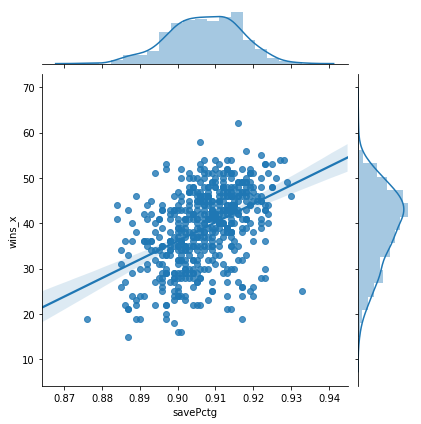

In [80]:
sns.jointplot(x="savePctg", y="wins_x", data=full_df, kind="reg")